# Analysis of CiDiff


## Imports and files

In [1]:
import numpy as np
import pandas as pd
import plotnine as pn
import mizani.transforms as tr

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [2]:
DATASET_FILE = "../build/reports/dataset.csv"
BENCHMARK_FILE = "../build/reports/florent.csv"


## Dataset Analysis

In [3]:
dataset = pd.read_csv(DATASET_FILE, sep=',')
dataset["total_size"] = dataset["success"] + dataset["failure"]
dataset.head()

,repository,run,language,success,failure,total_size
0,stimulusreflex/cable_ready,run740-1,Ruby,587,492,1079
1,stimulusreflex/cable_ready,run456-0,Ruby,585,603,1188
2,stimulusreflex/cable_ready,run740-2,Ruby,579,498,1077
3,stimulusreflex/cable_ready,run740-0,Ruby,588,486,1074
4,stimulusreflex/cable_ready,run740-3,Ruby,587,507,1094


In [4]:
len(dataset)

22260

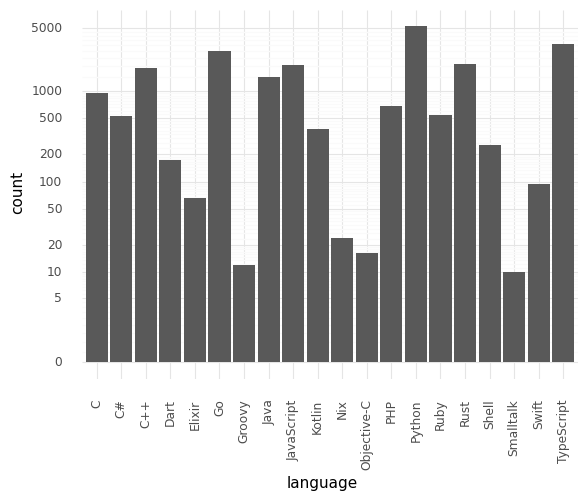

<ggplot: (319605733)>

In [5]:
pn.ggplot(dataset, pn.aes(x="language")) + pn.geom_bar() + pn.theme_minimal() + pn.theme(axis_text_x = pn.element_text(angle = 90)) + pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10), breaks=[0, 5, 10, 20, 50, 100, 200, 500, 1000, 5000])

In [6]:
dataset["language"].value_counts().to_frame()

,language
Python,5211
TypeScript,3355
Go,2773
Rust,1978
JavaScript,1952
C++,1799
Java,1428
C,962
PHP,690
Ruby,543


In [7]:
len(set(dataset["repository"].to_list()))

7984

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


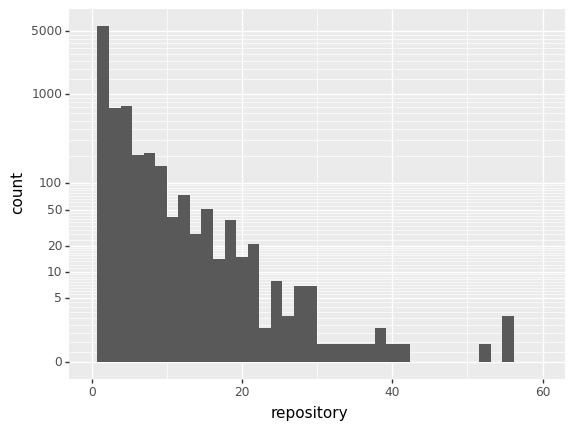

<ggplot: (322030565)>

In [8]:
pn.ggplot(dataset["repository"].value_counts().to_frame(), pn.aes(x="repository")) + pn.geom_histogram(bins=40) + pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10), breaks=[0, 5, 10, 20,50, 100, 1000, 5000]) + pn.xlim(0,60)

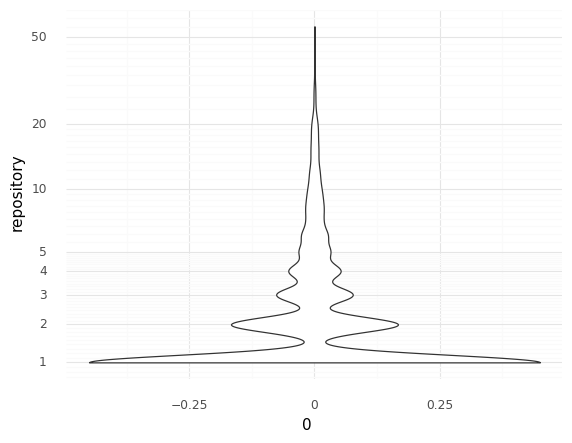

<ggplot: (322111061)>

In [9]:
pn.ggplot(dataset["repository"].value_counts().to_frame(), pn.aes(x=0, y="repository")) + pn.geom_violin() +  pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10), breaks=[0, 1, 2, 3, 4, 5, 10, 20,50, 100, 1000, 5000]) + pn.theme_minimal()

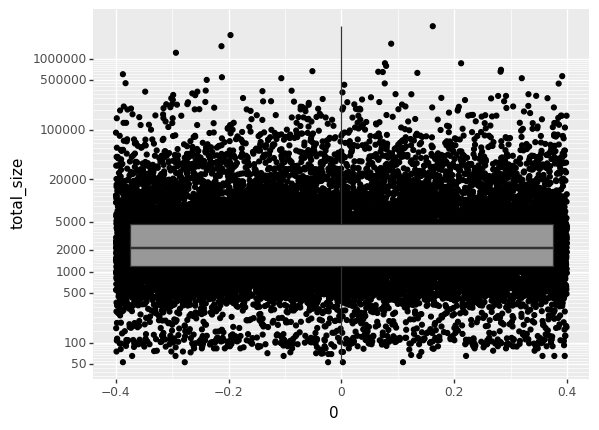

<ggplot: (322246649)>

In [10]:
pn.ggplot(dataset, pn.aes(x=0, y="total_size")) + pn.geom_jitter() + pn.geom_boxplot(coef=1000, alpha=0.6) + pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10), breaks=[0, 50, 100, 500, 1000, 2000, 5000, 20000, 100000, 500000, 1000000])

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 115'. Pick better value with 'binwidth'.


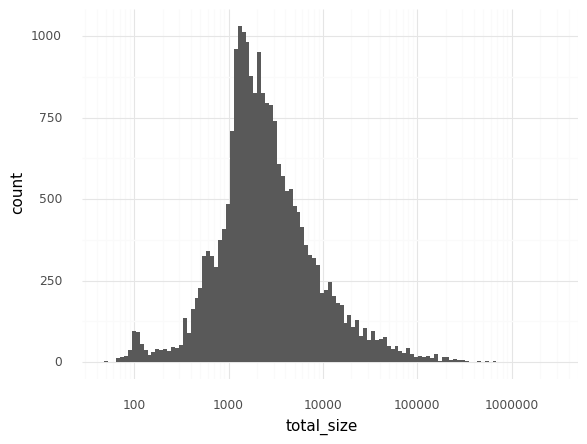

<ggplot: (322371573)>

In [11]:
pn.ggplot(dataset, pn.aes(x="total_size")) + pn.geom_histogram() + pn.scale_x_log10(breaks=[1,10,100,1000,10000,100000,1000000], labels=["1","10","100","1000","10000","100000","1000000"]) + pn.theme_minimal()

## Benchmark Results Analysis

In [12]:
data = pd.read_csv(BENCHMARK_FILE, sep=',')
data = data.loc[data['type'].isin(["lcs", "seed"])]
data.head()

,directory,type,duration,lines-left,lines-right,actions,added,deleted,updated,moved-unchanged,moved-updated,similar-groups,similar-groups-left,similar-groups-right
0,stimulusreflex/cable_ready/run740-1,seed,11,587,492,112,3,98,11,0,0,52,25,27
1,stimulusreflex/cable_ready/run740-1,lcs,2,587,492,123,14,109,0,0,0,52,25,27
2,stimulusreflex/cable_ready/run456-0,seed,4,585,603,49,25,7,17,0,0,65,31,34
3,stimulusreflex/cable_ready/run456-0,lcs,1,585,603,66,42,24,0,0,0,64,31,33
4,stimulusreflex/cable_ready/run740-2,seed,2,579,498,112,11,92,9,0,0,48,25,23


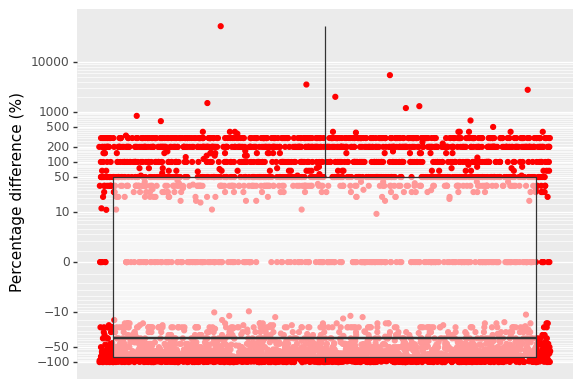

<ggplot: (322100153)>

In [13]:
lcs_durations = data.loc[data['type'] == 'lcs']["duration"].to_list()
seed_even_durations = data.loc[data['type'] == 'seed']["duration"].to_list()
durations_diffs_list = [((row[1] + 1 - row[0] + 1) / (row[0] + 1)) * 100 for row in zip(lcs_durations, seed_even_durations)]
durations_diffs = pd.DataFrame({'difference': durations_diffs_list})
durations_diffs.head()
pn.ggplot(durations_diffs, pn.aes(x=1, y="difference")) + pn.geom_jitter(color="red") + pn.geom_boxplot(coef=1000000, alpha=0.6) + pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10), breaks = [-100, -50, -10, 0, 10, 50, 100, 200, 500, 1000, 10000]) + pn.scale_x_continuous(breaks= []) + pn.xlab("") + pn.ylab("Percentage difference (%)")


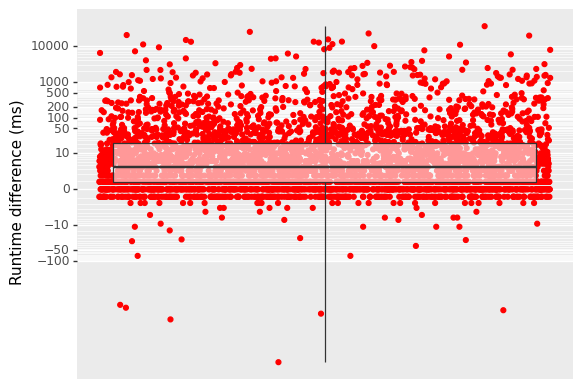

<ggplot: (322856909)>

In [14]:
lcs_durations = data.loc[data['type'] == 'lcs']["duration"].to_list()
seed_even_durations = data.loc[data['type'] == 'seed']["duration"].to_list()
durations_diffs_list = [row[0] - row[1] for row in zip(lcs_durations, seed_even_durations)]
durations_diffs = pd.DataFrame({'difference': durations_diffs_list})
durations_diffs.head()
pn.ggplot(durations_diffs, pn.aes(x=1, y="difference")) + pn.geom_jitter(color="red") + pn.geom_boxplot(coef=1000000, alpha=0.6) + pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10), breaks = [-100, -50, -10, 0, 10, 50, 100, 200, 500, 1000, 10000]) + pn.scale_x_continuous(breaks= []) + pn.xlab("") + pn.ylab("Runtime difference (ms)")

In [15]:
lcs_durations_df = data.loc[data['type'] == 'lcs']
long = lcs_durations_df[lcs_durations_df["duration"] > 1000]
print(len(long))
display(long)

113


,directory,type,duration,lines-left,lines-right,actions,added,deleted,updated,moved-unchanged,moved-updated,similar-groups,similar-groups-left,similar-groups-right
245,calcom/docker/run1004-0,lcs,5186,15206,14843,27937,13787,14150,0,0,0,479,238,241
283,opendronemap/webodm/run466-0,lcs,4517,13605,8499,20332,7613,12719,0,0,0,154,77,77
323,oracle/coherence/run3186-0,lcs,2234,23554,12581,15279,2153,13126,0,0,0,4406,2200,2206
331,boa-dev/boa/run8131-0,lcs,2443,19155,6906,17965,2858,15107,0,0,0,3266,1635,1631
461,libressl-portable/portable/run94-0,lcs,8121,22130,15464,36150,14742,21408,0,0,0,172,117,55
599,alteryx/evalml/run547-0,lcs,1994,8454,9060,13524,7065,6459,0,0,0,1867,931,936
637,sabnzbd/sabnzbd/run3429-7,lcs,7826,16581,16856,29191,14733,14458,0,0,0,2070,1045,1025
639,sabnzbd/sabnzbd/run3429-6,lcs,10846,16549,15643,27766,13430,14336,0,0,0,1910,983,927
641,sabnzbd/sabnzbd/run3429-1,lcs,12445,16719,17032,29243,14778,14465,0,0,0,2132,1065,1067
643,sabnzbd/sabnzbd/run3429-0,lcs,11077,16779,17126,29297,14822,14475,0,0,0,1950,981,969


In [16]:
seed_durations_df = data.loc[data['type'] == 'seed']
long = seed_durations_df[seed_durations_df["duration"] > 1000]
print(len(long))
display(long)

8


,directory,type,duration,lines-left,lines-right,actions,added,deleted,updated,moved-unchanged,moved-updated,similar-groups,similar-groups-left,similar-groups-right
946,wesleyosantos91/poc-multi-module-arch-hexagonal-springboot/run279-0,seed,4431,5141,2653,5083,1163,3651,258,7,4,215,106,109
948,wesleyosantos91/poc-multi-module-arch-hexagonal-springboot/run272-0,seed,2325,6758,4416,6300,1421,3763,1070,24,22,3770,1890,1880
2280,corunet/kloadgen/run735-0,seed,2568,7120,6748,2630,121,493,1633,303,80,6786,3390,3396
3746,backube/volsync/run2678-0,seed,1102,12865,29590,25732,17651,926,1044,4660,1451,10117,4984,5133
4236,tcopengroup/tcopen/run1179-0,seed,67002,5334,3437,3433,375,2272,724,6,56,353,178,175
4690,asyncapi/asyncapi-react/run103-0,seed,12208,24424,24459,23554,1700,1665,1309,18838,42,4348,2248,2100
7302,github/gh-gei/run3974-0,seed,3037,1614,2427,2367,1109,296,952,10,0,172,84,88
7530,lancedb/lance/run46-0,seed,1706,2346,1018,2100,208,1536,290,66,0,219,110,109


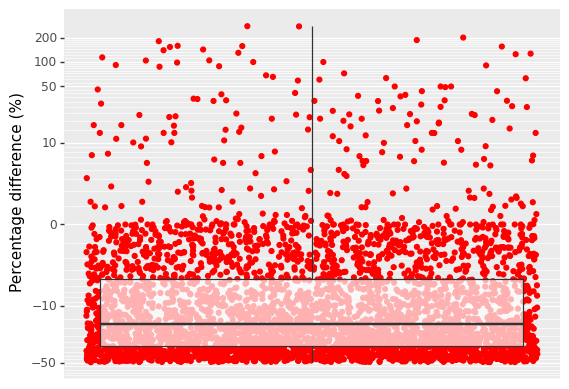

<ggplot: (322783113)>

In [17]:
lcs_actions = data.loc[data['type'] == 'lcs']["actions"].to_list()
seed_even_actions = data.loc[data['type'] == 'seed']["actions"].to_list()
actions_diffs_list = [((row[1] + 1 - row[0] + 1) / (row[0] + 1)) * 100 for row in zip(lcs_actions, seed_even_actions)]
actions_diffs = pd.DataFrame({'difference': actions_diffs_list})
actions_diffs.head()
pn.ggplot(actions_diffs, pn.aes(x=1, y="difference")) + pn.geom_jitter(color="red") + pn.geom_boxplot(coef=10000, alpha=0.7) + pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10), breaks = [-100, -50, -10, 0, 10, 50, 100, 200]) + pn.scale_x_continuous(breaks= []) + pn.xlab("") + pn.ylab("Percentage difference (%)")

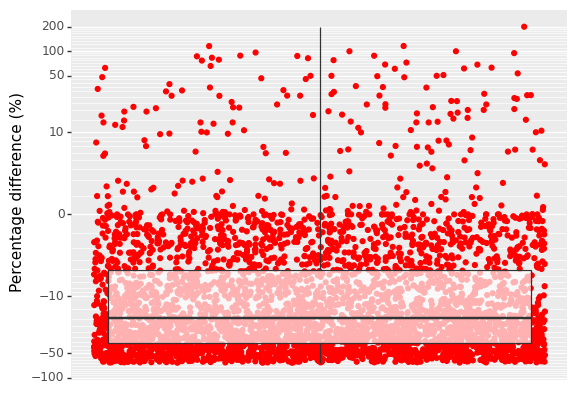

<ggplot: (323031945)>

In [18]:
lcs_actions = data.loc[data['type'] == 'lcs']["actions"].to_list()
seed_even_actions = data.loc[data['type'] == 'seed']["actions"].to_list()
actions_diffs_list = [((row[1] + 1 - row[0] + 1) / ((row[0] + 1 + row[1] + 1) / 2)) * 100 for row in zip(lcs_actions, seed_even_actions)]
actions_diffs = pd.DataFrame({'difference': actions_diffs_list})
actions_diffs.head()
pn.ggplot(actions_diffs, pn.aes(x=1, y="difference")) + pn.geom_jitter(color="red") + pn.geom_boxplot(coef=10000, alpha=0.7) + pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10), breaks = [-100, -50, -10, 0, 10, 50, 100, 200]) + pn.scale_x_continuous(breaks= []) + pn.xlab("") + pn.ylab("Percentage difference (%)")

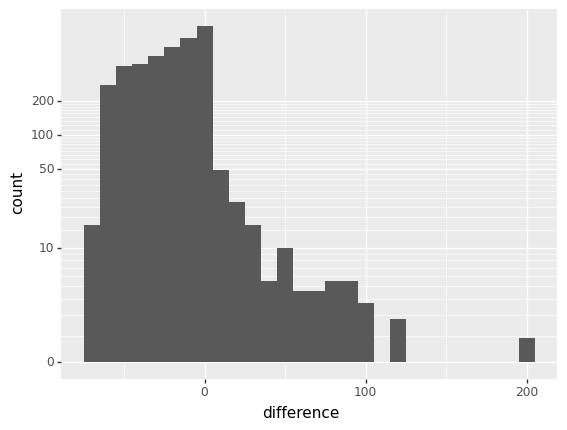

<ggplot: (322914761)>

In [19]:
pn.ggplot(actions_diffs, pn.aes(x="difference")) + pn.geom_histogram(binwidth=10) + pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10), breaks = [-100, -50, -10, 0, 10, 50, 100, 200]) 

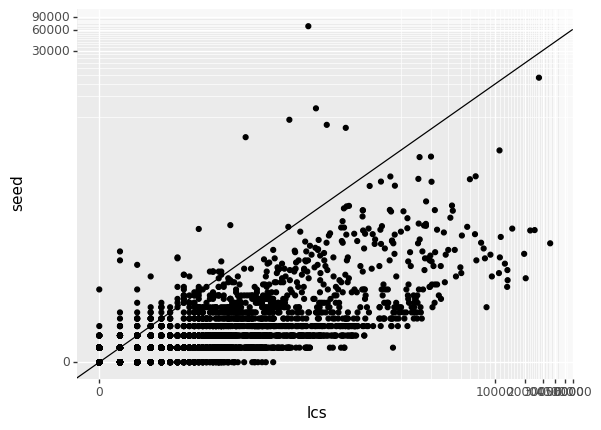

<ggplot: (323039365)>

In [20]:
lcs_durations = data.loc[data['type'] == 'lcs']["duration"].to_list()
seed_even_durations = data.loc[data['type'] == 'seed']["duration"].to_list()
durations = pd.DataFrame({'lcs': lcs_durations, 'seed': seed_even_durations})

pn.ggplot(durations, pn.aes(x="lcs", y="seed")) + pn.geom_point() + pn.geom_abline(slope=1) + pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10)) + pn.scale_x_continuous(trans=tr.pseudo_log_trans(base=10))

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/scales/scales.py:36: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/scales/scales.py:36: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/Users/falleri/.pyenv/versions/3.11.2/lib/python3.11/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 49 rows containing missing values.


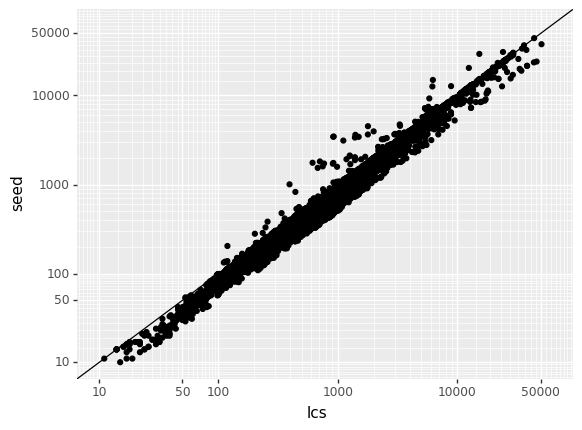

<ggplot: (322524625)>

In [21]:
lcs_actions = data.loc[data['type'] == 'lcs']["actions"].to_list()
seed_actions = data.loc[data['type'] == 'seed']["actions"].to_list()
actions = pd.DataFrame({'lcs': lcs_actions, 'seed': seed_actions})

pn.ggplot(actions, pn.aes(x="lcs", y="seed")) + pn.geom_point() + pn.geom_abline(slope=1) + pn.ylim(-1, 60000) + pn.xlim(-1, 60000) + pn.scale_y_continuous(trans=tr.pseudo_log_trans(base=10), breaks = [0, 1, 5, 10, 50, 100, 1000, 10000, 50000, 100000], limits=[10, 60000]) + pn.scale_x_continuous(trans=tr.pseudo_log_trans(base=10), breaks = [0, 1, 5, 10, 50, 100, 1000, 10000, 50000, 100000], limits=[10, 60000])

In [22]:
tmp_actions = data.loc[data['type'] == 'lcs']
tmp_actions["actions_new"] = seed_actions = data.loc[data['type'] == 'seed']["actions"].to_list()
display(tmp_actions[tmp_actions["actions"] < tmp_actions["actions_new"]])


/var/folders/kk/cgjmm8nx2cq30pc0gryphmjm0000gn/T/ipykernel_79207/2782471160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,directory,type,duration,lines-left,lines-right,actions,added,deleted,updated,moved-unchanged,moved-updated,similar-groups,similar-groups-left,similar-groups-right,actions_new
27,uniswap/interface/run12864-0,lcs,21,1207,44,1171,4,1167,0,0,0,15,10,5,1172
97,bpfd-dev/bpfd/run2335-1,lcs,0,47,478,441,436,5,0,0,0,16,7,9,448
149,schemahero/schemahero/run1583-4,lcs,2,1184,1124,456,198,258,0,0,0,391,193,198,468
151,schemahero/schemahero/run1583-3,lcs,2,1194,1073,513,196,317,0,0,0,371,187,184,527
255,sqlfluff/sqlfluff/run59-0,lcs,7,1370,823,1061,257,804,0,0,0,236,119,117,1064
267,cockpit-project/cockpit/run111-0,lcs,2,1067,792,441,83,358,0,0,0,182,97,85,826
311,cov-lineages/pangolin/run247-0,lcs,57,4109,1309,3268,234,3034,0,0,0,338,133,205,3791
313,cov-lineages/pangolin/run672-0,lcs,29,3606,1859,2171,212,1959,0,0,0,496,257,239,2651
323,oracle/coherence/run3186-0,lcs,2234,23554,12581,15279,2153,13126,0,0,0,4406,2200,2206,29319
433,pyansys/pymapdl/run327-0,lcs,0,161,366,235,220,15,0,0,0,46,23,23,286


In [27]:
tmp_actions = data.loc[data['type'] == 'lcs']
tmp_actions["duration_new"] = data.loc[data['type'] == 'seed']["duration"].to_list()
display(tmp_actions[tmp_actions["duration"] < tmp_actions["duration_new"]])

/var/folders/kk/cgjmm8nx2cq30pc0gryphmjm0000gn/T/ipykernel_79207/3283531252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,directory,type,duration,lines-left,lines-right,actions,added,deleted,updated,moved-unchanged,moved-updated,similar-groups,similar-groups-left,similar-groups-right,duration_new
1,stimulusreflex/cable_ready/run740-1,lcs,2,587,492,123,14,109,0,0,0,52,25,27,11
3,stimulusreflex/cable_ready/run456-0,lcs,1,585,603,66,42,24,0,0,0,64,31,33,4
5,stimulusreflex/cable_ready/run740-2,lcs,0,579,498,117,18,99,0,0,0,56,29,27,2
37,sidorares/node-mysql2/run834-3,lcs,7,1812,636,1272,48,1224,0,0,0,126,63,63,8
39,sidorares/node-mysql2/run834-4,lcs,7,1781,636,1257,56,1201,0,0,0,144,65,79,12
41,sidorares/node-mysql2/run834-1,lcs,7,1851,636,1311,48,1263,0,0,0,128,65,63,18
43,sidorares/node-mysql2/run834-2,lcs,7,1770,627,1249,53,1196,0,0,0,152,79,73,9
45,sidorares/node-mysql2/run834-6,lcs,7,1829,630,1299,50,1249,0,0,0,146,79,67,9
47,sidorares/node-mysql2/run834-5,lcs,7,1812,636,1274,49,1225,0,0,0,130,65,65,18
51,sidorares/node-mysql2/run834-0,lcs,7,1793,630,1261,49,1212,0,0,0,140,75,65,11
